<a href="https://colab.research.google.com/github/Harshr24/Data_science/blob/main/Data_Visualization_Exploration_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

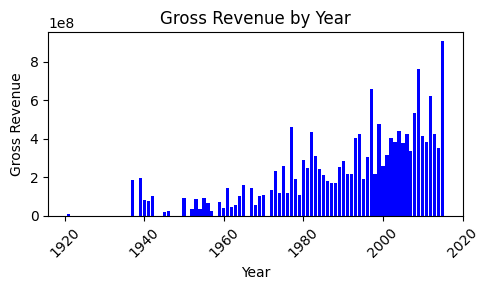

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
top_movies = pd.read_csv('top_movies.csv')
# Plotting the vertical histogram
plt.figure(figsize=(5, 3))
plt.bar(top_movies['Year'], top_movies['Gross'], color='blue')
plt.title('Gross Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
# Display the plot
plt.show()


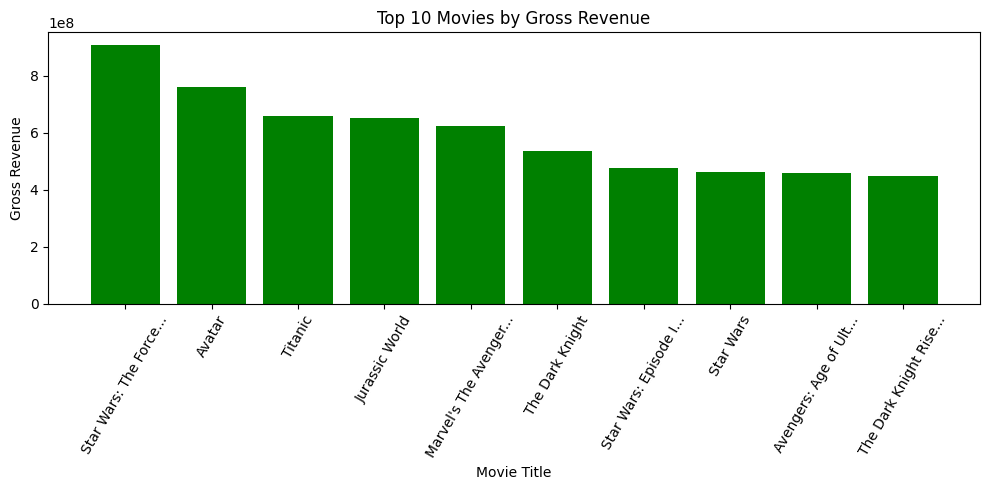

In [ ]:
import matplotlib.pyplot as plt
# Sort by gross revenue and select the top 10
top_10_movies = top_movies.sort_values(by='Gross', ascending=False).head(10)
# Plotting the histogram
plt.figure(figsize=(10,5))
plt.bar(top_10_movies['Title'], top_10_movies['Gross'], color='green')
# Shorten titles for better display
shortened_titles = [title[:20] + '...' if len(title) > 20 else title for title in top_10_movies['Title']]
plt.title('Top 10 Movies by Gross Revenue')
plt.xlabel('Movie Title')
plt.ylabel('Gross Revenue')
# Set the x-ticks and their labels
plt.xticks(ticks=range(len(shortened_titles)), labels=shortened_titles, rotation=60)
plt.tight_layout()
plt.show()

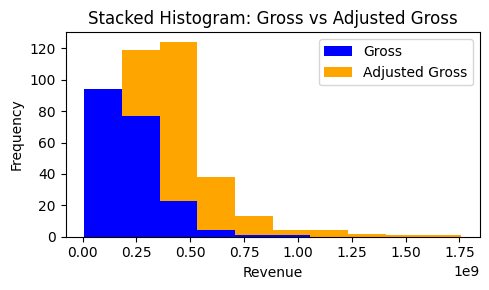

In [ ]:
plt.hist([top_movies['Gross'], top_movies['Gross (Adjusted)']], stacked=True, color=['blue', 'orange'], label=['Gross', 'Adjusted Gross'])
plt.title('Stacked Histogram: Gross vs Adjusted Gross'); plt.xlabel('Revenue'); plt.ylabel('Frequency'); plt.legend(); plt.tight_layout(); plt.show()

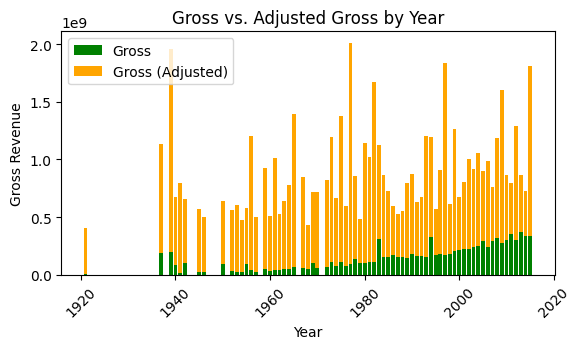

In [ ]:
plt.bar(top_movies['Year'], top_movies['Gross'], label='Gross', color='g')
plt.bar(top_movies['Year'], top_movies['Gross (Adjusted)'], bottom=top_movies['Gross'], label='Adjusted', color='orange')
plt.title('Gross vs. Adjusted Gross by Year'); plt.xlabel('Year'); plt.ylabel('Gross Revenue'); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()

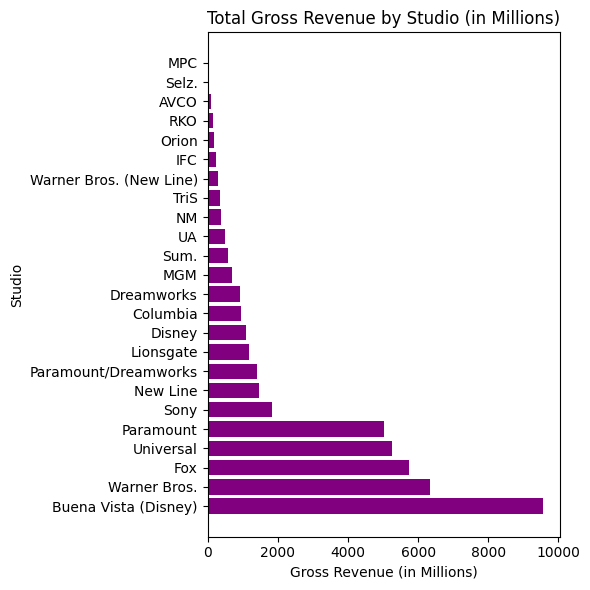

In [ ]:
studio_gross = top_movies.groupby('Studio')['Gross'].sum().sort_values()
plt.barh(studio_gross.index, studio_gross / 1_000_000, color='purple')
plt.title('Total Gross Revenue by Studio (in Millions)'); plt.xlabel('Gross Revenue (M)'); plt.ylabel('Studio'); plt.tight_layout(); plt.show()

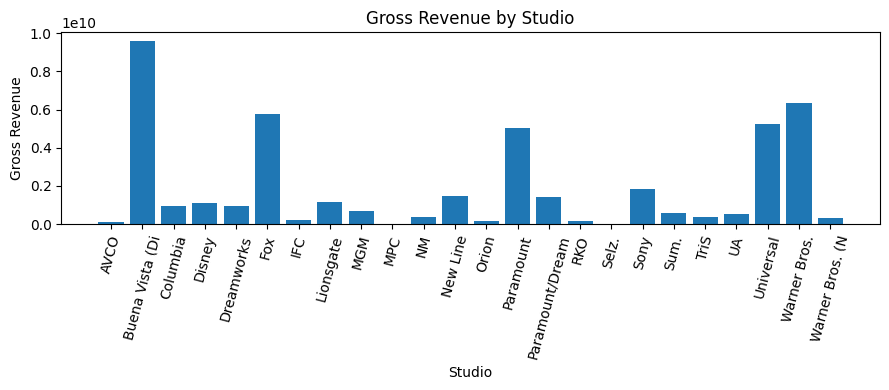

In [ ]:
gross_revenue_by_studio = top_movies.groupby('Studio')['Gross'].sum()
plt.bar(gross_revenue_by_studio.index.str[:15], gross_revenue_by_studio.values)
plt.title('Gross Revenue by Studio'); plt.xlabel('Studio'); plt.ylabel('Gross Revenue'); plt.xticks(rotation=75); plt.tight_layout(); plt.show()

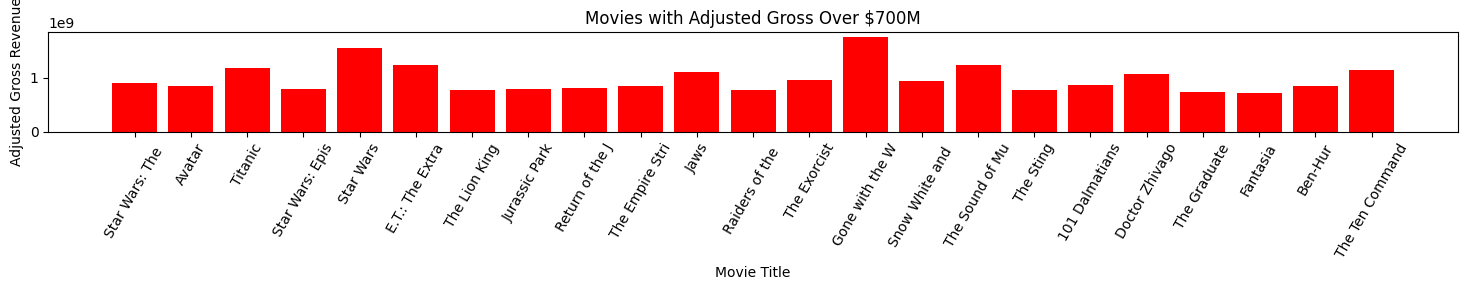

In [ ]:
filtered_movies = top_movies[top_movies['Gross (Adjusted)'] > 700_000_000]
plt.figure(figsize=(15, 3))
plt.bar(filtered_movies['Title'].str[:15], filtered_movies['Gross (Adjusted)'], color='red')
plt.title('Movies with Adjusted Gross Over $700M'); plt.xlabel('Movie Title'); plt.ylabel('Adjusted Gross Revenue'); plt.xticks(rotation=60); plt.tight_layout(); plt.show()

In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


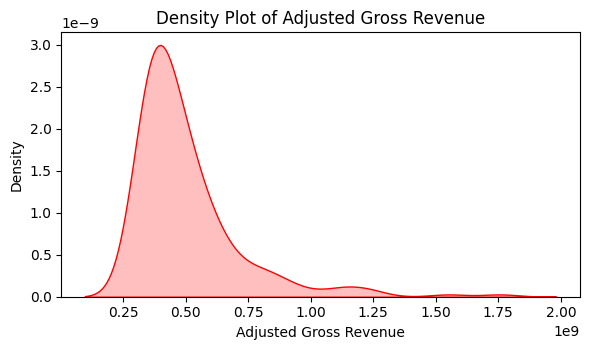

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 3.6))
sns.kdeplot(top_movies['Gross (Adjusted)'], fill=True, color='red')
plt.title('Density Plot of Adjusted Gross Revenue'); plt.xlabel('Adjusted Gross Revenue'); plt.ylabel('Density'); plt.tight_layout(); plt.show()

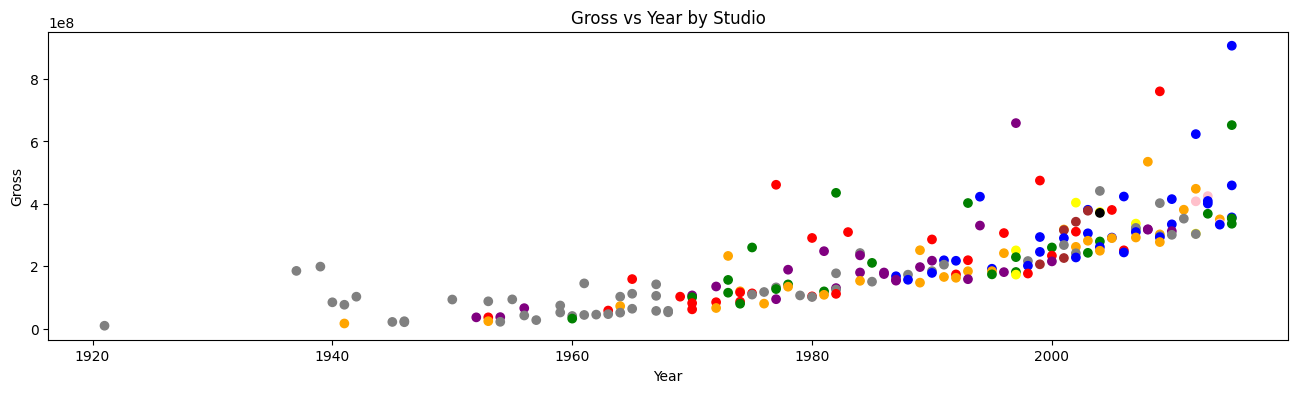

In [ ]:
df = pd.read_csv('top_movies.csv')
# Create a dictionary to map studios to colors
studio_colors = {
    'Buena Vista (Disney)': 'blue', 'Fox': 'red', 'Universal': 'green',
    'Warner Bros.': 'orange', 'Paramount': 'purple', 'Sony': 'yellow',
    'Lionsgate': 'pink', 'New Line': 'brown', 'Dreamworks': 'gray', 'NM': 'black'
}
plt.figure(figsize=(16, 4))
plt.scatter(df['Year'], df['Gross'], c=df['Studio'].map(studio_colors).fillna('gray'))
plt.title('Gross vs Year by Studio'); plt.xlabel('Year'); plt.ylabel('Gross'); plt.show()

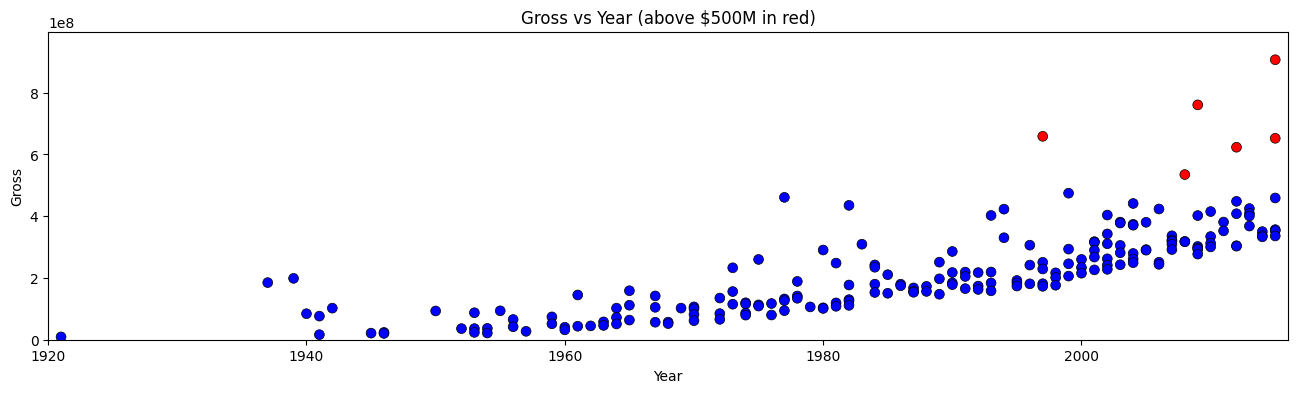

In [ ]:
plt.figure(figsize=(16, 4))
plt.scatter(df['Year'], df['Gross'],
            c=['red' if g > 500_000_000 else 'blue' for g in df['Gross']],
            s=50, edgecolors='black', linewidth=0.5)
plt.title('Gross vs Year (above $500M in red)'); plt.xlabel('Year'); plt.ylabel('Gross')
plt.xlim(df['Year'].min() - 1, df['Year'].max() + 1); plt.ylim(0, df['Gross'].max() * 1.1); plt.show()

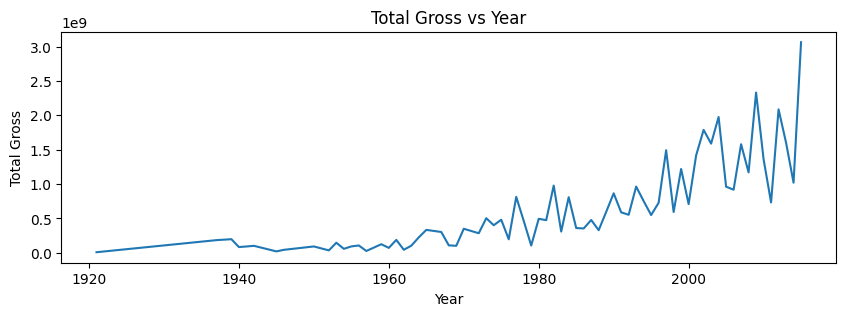

In [ ]:
yearly_gross = df.groupby('Year')['Gross'].sum()
plt.figure(figsize=(10, 3))
plt.plot(yearly_gross.index, yearly_gross.values)
plt.title('Total Gross vs Year'); plt.xlabel('Year'); plt.ylabel('Total Gross'); plt.show()

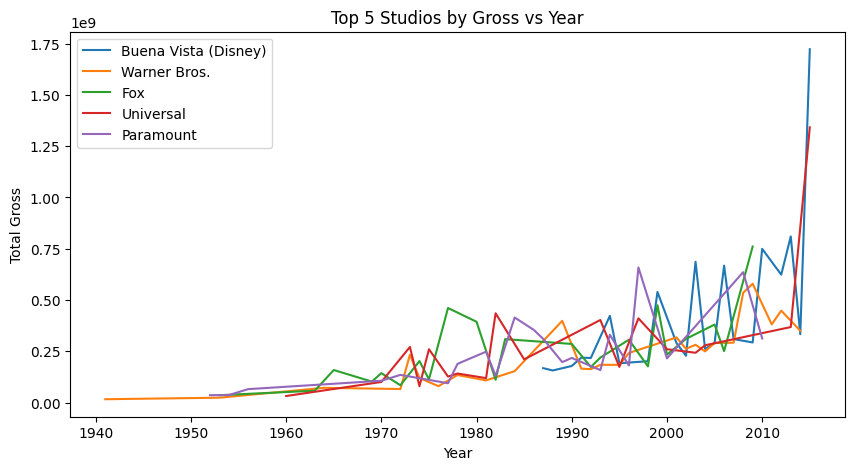

In [ ]:
top_studios = df.groupby(['Studio', 'Year'])['Gross'].sum().reset_index()
top_studios = top_studios.groupby('Studio')['Gross'].sum().nlargest(5).index

plt.figure(figsize=(10, 5))
for studio in top_studios:
    studio_data = df[df['Studio'] == studio].groupby('Year')['Gross'].sum()
    plt.plot(studio_data.index, studio_data, label=studio)

plt.title('Top 5 Studios by Gross vs Year')
plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.legend()
plt.show()

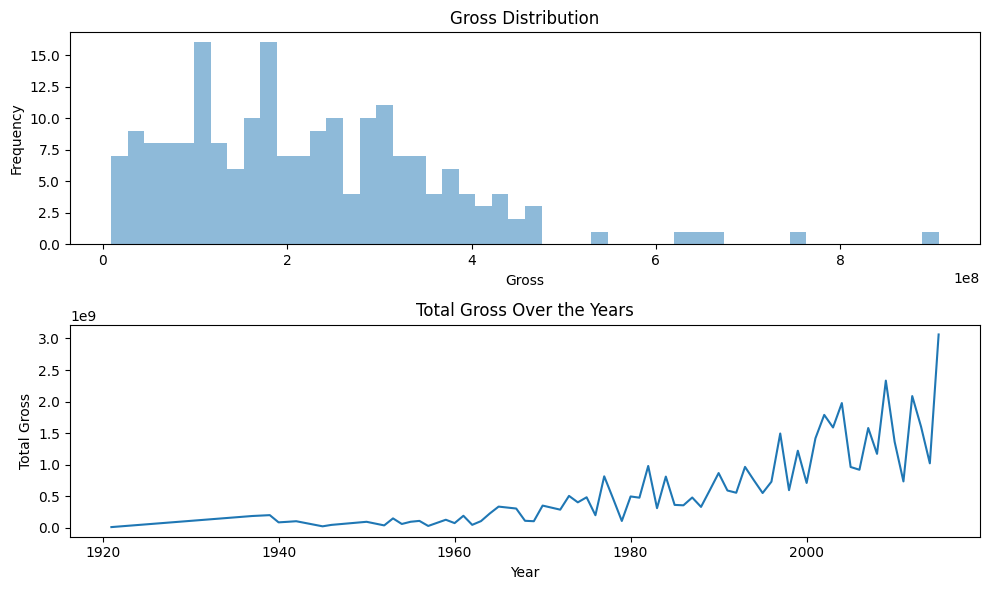

In [ ]:
yearly_gross = df.groupby('Year')['Gross'].sum()
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
# Histogram of the gross values
axs[0].hist(df['Gross'], bins=50, alpha=0.5)
axs[0].set(title='Gross Distribution', xlabel='Gross', ylabel='Frequency')
# Line graph of the total gross over the years
axs[1].plot(yearly_gross.index, yearly_gross.values)
axs[1].set(title='Total Gross Over the Years', xlabel='Year', ylabel='Total Gross')
# Layout adjustment
fig.tight_layout()
plt.show()

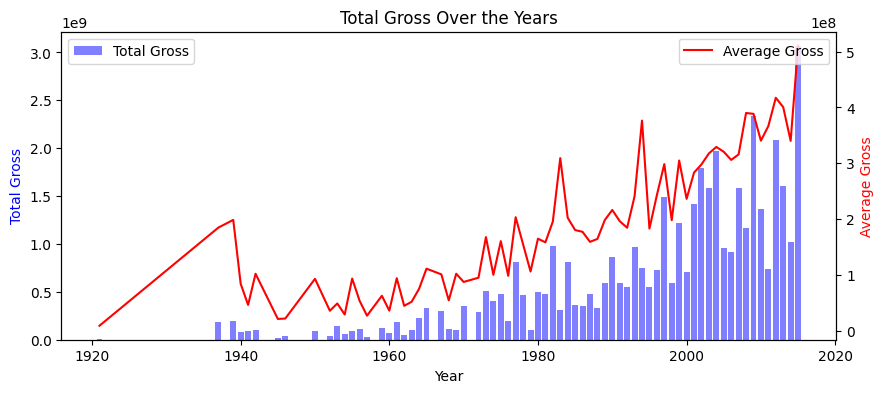

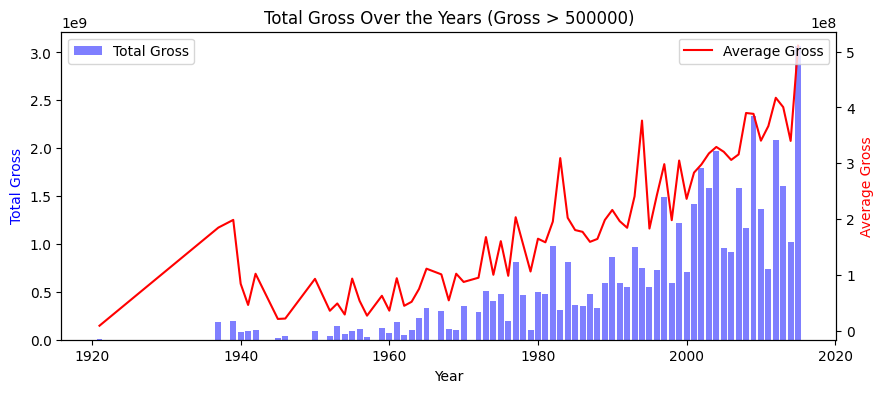

In [ ]:
def plot_gross_data(df, title):
    yearly_gross = df.groupby('Year')['Gross'].sum()
    yearly_avg_gross = df.groupby('Year')['Gross'].mean()
    fig, ax1 = plt.subplots(figsize=(10, 4))
    ax1.bar(yearly_gross.index, yearly_gross.values, color='b', alpha=0.5, label='Total Gross')
    ax1.set_title(title)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Total Gross', color='b')
    ax2 = ax1.twinx()
    ax2.plot(yearly_avg_gross.index, yearly_avg_gross.values, color='r', label='Average Gross')
    ax2.set_ylabel('Average Gross', color='r')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()
# Plot for total gross over the years
plot_gross_data(df, 'Total Gross Over the Years')
# Plot for total gross where Gross > 500,000
plot_gross_data(df[df['Gross'] > 500_000], 'Total Gross Over the Years (Gross > 500000)')